# Lanzamiento de un proyectil desde un avión

## Inicialización de Variables

Todas las variables que se piden como entrada.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

h_avion = 1000
d_lanzamiento = 300
h_canion = 2000
a = 65
angulo = np.radians(a)
l_canion = 800

g = 9.81
v0 = 120

## Superficie

Con esto se dibuja la forma del suelo y el cañón.

In [25]:
def f_lineal(m, b, x):
    return m * x + b

In [26]:
A = 0.5 * d_lanzamiento
Xa = [0, A]
Ya = [0, 0]

b = d_lanzamiento
B = A + b
Xb = [A, B]
Yb = [0, 0]

c = h_canion / np.tan(angulo)
C = B + c
mc = np.tan(np.pi - angulo)
c_corte = B * np.tan(angulo)
yc = f_lineal(mc, c_corte , C)
Xc = [B, C]
Yc = [0, yc]

D = C + l_canion
Xd = [C, D]
Yd = [-h_canion, -h_canion]

E = D + c
me = -mc
e_corte = -E * np.tan(angulo)
ye = f_lineal(me, e_corte, E)
Xe = [D, E]
Ye = [-h_canion, ye]

#f = A
#F = E + f
#Xf = [E, F]
#Yf = [0, 0]

## Colisión

### Colisión en rectas constantes (3)

Es el primer caso para encontrar el punto de colisión.

La ecuación se obtiene de despejar la ecuación de la trayectoria $y(x)$ a su versión de $x(y)$.
* Suelo: $y = 0$
* Cañón: $y = -h_{canion}$

In [27]:
def xrecta(y):
    return np.sqrt(((2 * v0**2) / g) * (h_avion - y)) + A

Con este valor ya se consigue el punto exacto de colisión en las lineas horizontales de la superficie.

Sería un sistema de ecuaciones entre:
* Ec. trayectoria: $y = [...]x^2$
* Exuacion constante: $x = n$

Pero, solo es reemplazo al ojo.


### Colisión en diagonales (2)

La siguiente función nos permitirá resolver el sistema de ecuaciones entre:
* Ec. trayectoria:$y = [...]x^2$
* Ec. lineal: $y = mx + b$

En la parte de *Casos*, se ve el despeje maldito para obtener los coeficientes $a, b, c$ de la ecuación cuadrática resultante, y así obtener la coordenada en $x$. Para después reemplazar en la ec. lineal para obtener la coordenada en $y$.

In [28]:
def resolver_cuadratica(a, b, c):
    discriminante = b**2 - 4 * a * c

    #if discriminante < 0:
    #    return "No hay soluciones reales"

    raiz_discriminante = np.sqrt(discriminante)
    x1 = (-b + raiz_discriminante) / (2 * a)
    #x2 = (-b - raiz_discriminante) / (2 * a)

    #return (x1, x2) if x1 != x2 else (x1,)
    return x1

## Casos
De todas las varaibles de entrada que se mencionan para la implementación, la única inherente al movimiento es la $v_0$ y, por lo tanto, de esta depende el movimiento.

Así, la mejor manera de separar los casos donde la bomba puede caer, es en función de la velocidad máxima que puede tener el avión para que la bomba caiga dentro de un intervalo de las distintas formas en las superficie.

La función queda determinada por $v(x, y)$, que depende de las coordenadas del punto final de los tramos de la superficie $(B, C, D, E)$, que se obtiene de despejar $v_0$ de la ec. de la trayectoria.

In [29]:
def velocidad_max(x, y):
    return np.sqrt(g / (2 * (h_avion - y))) * (x - A)


vb_max = velocidad_max(B, 0)
vc_max = velocidad_max(C, -h_canion)
vd_max = velocidad_max(D, -h_canion)
ve_max = velocidad_max(E, 0)

Se implementan todos los casos, dependiendo de la velocidad incial del avión.

In [30]:
if 0 < v0 <= vb_max:
    x_b = xrecta(0)
    y_b = 0
    colision = [x_b, y_b]
elif vb_max < v0 <= vc_max:
    a = g / (2 * v0**2)
    b = mc - ((g * A) / (v0**2))
    c = (g / (2 * v0**2)) * A**2 + c_corte - h_avion

    x_c = resolver_cuadratica(a, b, c)
    y_c = f_lineal(mc, c_corte, x_c)
    colision = [x_c, y_c]
elif vc_max < v0 <= vd_max:
    x_d = xrecta(-h_canion)
    y_d = -h_canion
    colision = [x_d, y_d]
elif vd_max < v0 <= ve_max:
    a = g / (2 * v0**2)
    b = me - ((g * A) / (v0**2))
    c = (g / (2 * v0**2)) * A**2 + e_corte - h_avion

    x_e = resolver_cuadratica(a, b, c)
    y_e = f_lineal(me, e_corte, x_e)
    colision = [x_e, y_e]
else:
    x_f = xrecta(0)
    y_f = 0
    colision = [x_f, y_f]

## Trayectoria

In [31]:
def trayectoria(x):
    return h_avion - (g / (2 * v0**2)) * (x - A) ** 2

In [32]:
x_col, y_col = colision

xs = np.linspace(A, x_col, 100)
ys = trayectoria(xs)

## Límite de la gráfica

In [33]:
f = A
F = E + f

if F < x_col:
    F = x_col + f 

Xf = [E, F]
Yf = [0, 0]

## Plot

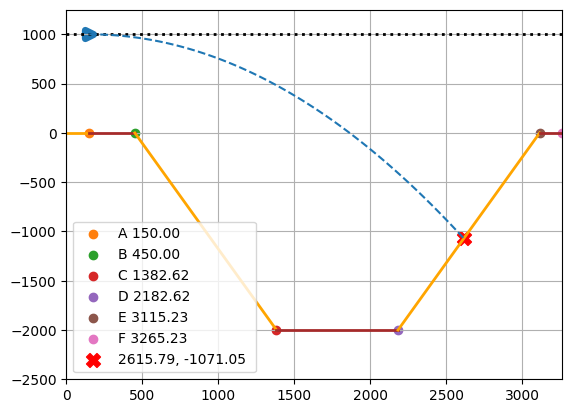

In [34]:
plt.scatter(A, h_avion, marker=">", linewidth=5)
plt.plot(Xa, Ya, color="orange", linewidth=2)
plt.scatter(A, 0, label=f"A {A:.2f}")
plt.plot(Xb, Yb, color="brown", linewidth=2)
plt.scatter(B, 0, label=f"B {B:.2f}")
plt.plot(Xc, Yc, color="orange", linewidth=2)
plt.scatter(C, yc, label=f"C {C:.2f}")
plt.plot(Xd, Yd, color="brown", linewidth=2)
plt.scatter(D, -h_canion, label=f"D {D:.2f}")
plt.plot(Xe, Ye, color="orange", linewidth=2)
plt.scatter(E, 0, label=f"E {E:.2f}")
plt.plot(Xf, Yf, color="brown", linewidth=2)
plt.scatter(F, 0, label=f"F {F:.2f}")

plt.axhline(h_avion, linestyle=":", color="black", linewidth=2)

plt.scatter(
    x_col,
    y_col,
    marker="X",
    s=100,
    color="red",
    label=f"{x_col:.2f}, {y_col:.2f} ",
)

plt.plot(xs, ys, linestyle="--")

plt.xlim(0, F)
plt.ylim(-1.25 * h_canion, 1.25 * h_avion)
plt.legend()
plt.grid()
plt.show()